In [1]:
import torch
import pandas as pd
from util import (
                    Autoencoder,
                    load_pkl_file,
                    recond_Data,
                    normalize_and_add_count,
                    plot_data_with_customization,
                    plot_cyclone_recovery,
                    find_peaks_in_concave_segments,
                    process_event_data
                )



In [2]:

# Load the model checkpoint
checkpoint = torch.load("saved_models/trained_autoencoder_model_500.pth")


C:\Users\mi0025\AppData\Local\Temp\ipykernel_47456\2840507858.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("saved_models/trained_autoencoder_m

In [3]:

# Define model parameters
input_size = 4  # Features: Temperature, Salinity, DO_mgl, Turbidity
hidden_size = 64
sequence_length = 24 * 7  # One week of hourly data
num_layers = 5  # Number of LSTM layers


In [4]:

# Choose the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [5]:

# Initialize the autoencoder model
autoencoder = Autoencoder(input_size, hidden_size, num_layers).to(device)

# Load the model weights
autoencoder.load_state_dict(checkpoint['model_state_dict'])
print("Model loaded successfully!")



Model loaded successfully!


In [6]:

# Load test data
test_data = load_pkl_file('data/test_data.pkl')

# Inspect the first entry to understand the structure
print(f"Number of entries in test_data: {len(test_data)}")
print("Sample entry keys:", test_data[0].keys())
print("Data entry sample:\n", test_data[0]["Data"].head())



Number of entries in test_data: 1
Sample entry keys: dict_keys(['Estuary', 'Year', 'Data'])
Data entry sample:
                           Temp      Sal    DO_mgl       Turb
Date                                                        
2020-05-01 00:00:00  18.034041  0.16516  9.629817  54.547015
2020-05-01 01:00:00  18.034041  0.16516  9.629817  54.547015
2020-05-01 02:00:00  18.034041  0.16516  9.629817  54.547015
2020-05-01 03:00:00  18.034041  0.16516  9.629817  54.547015
2020-05-01 04:00:00  18.034041  0.16516  9.629817  54.547015


C:\Users\mi0025\Documents\Research\anomalydetector\gh-repos\TropicalCyclones\modelv10\util.py:114: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  sequences = torch.tensor(sequences, dtype=torch.float32).to(device)
C:\Users\mi0025\Documents\Research\anomalydetector\gh-repos\TropicalCyclones\modelv10\util.py:473: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_reconstructed_data['smoothed_error'] = smoothed_data


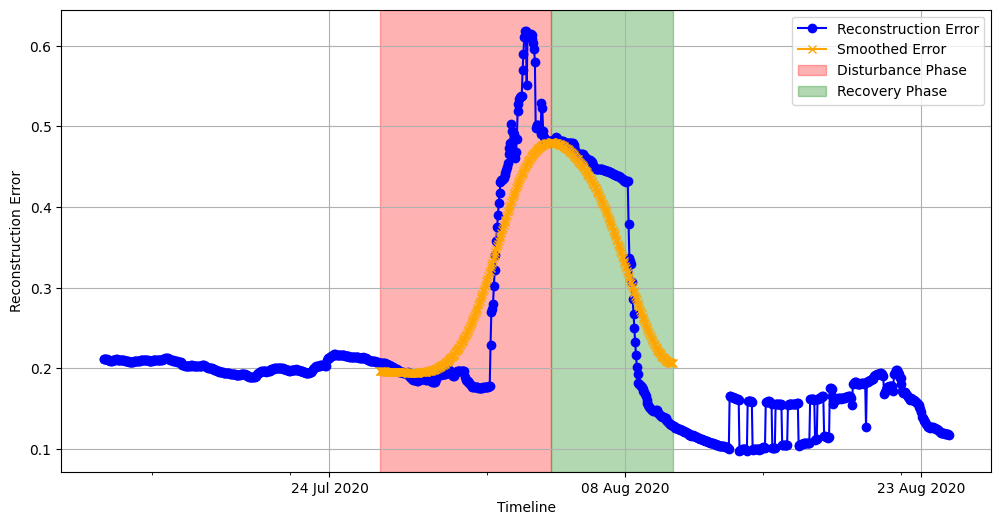

Plot saved to RecoveryPlots\cyclone_disturbance_recovery_CBMOC_Unknown_2020_2.png


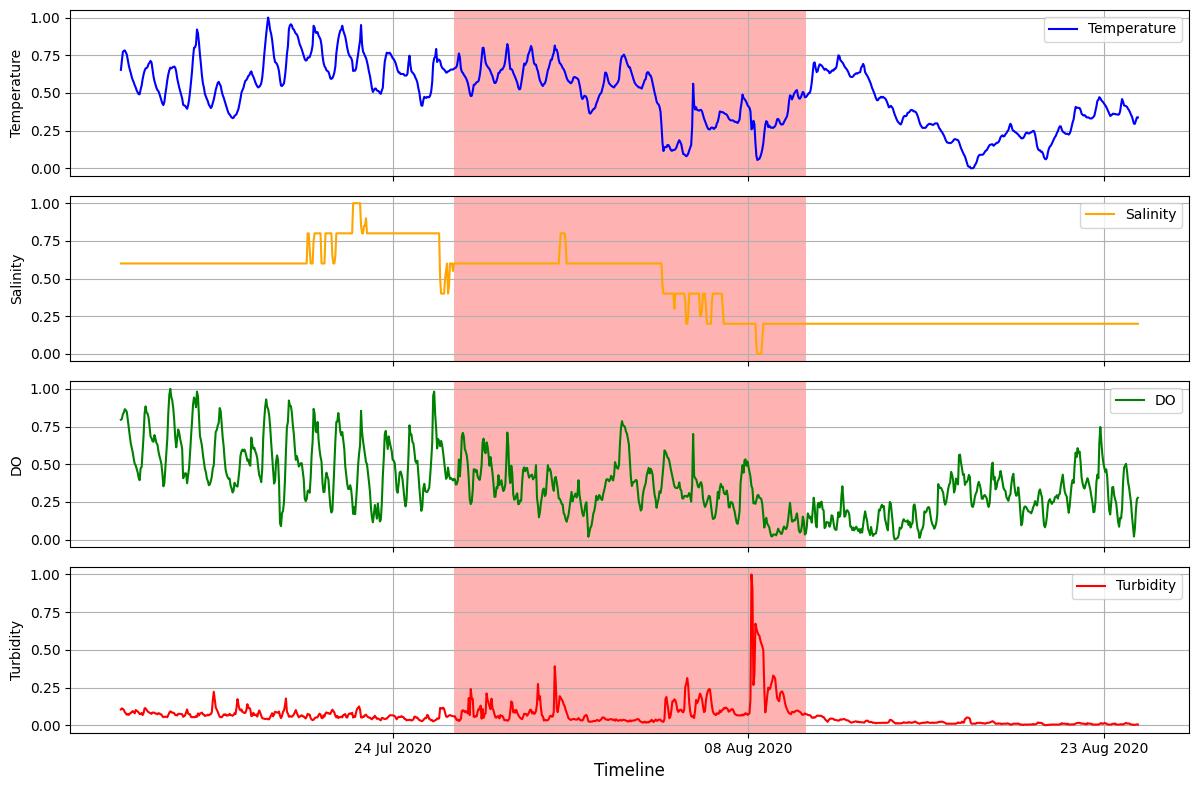

Plot saved to featurePlot_subs\customized_plot_CBMOC_Unknown_2020_2.png


In [7]:


# Process the test data
process_event_data(test_data, autoencoder, device)
